In [ ]:
# Logistic Regression dengan Scikit-learn
# Prepare Data
import pandas as pd
df1 = pd.read_csv('calonpembeli_ch5.csv')
df1

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [ ]:
df1.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


In [ ]:
# Menghapus Noise
df1 = df1[df1['Usia'] <= 100]

In [ ]:
df1.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,501.073146,43.323647,1.469940,0.480962,0.953908,270.430862,0.634269
std,288.823862,11.774139,1.073338,0.499888,0.801127,95.026802,0.481876
min,1.000000,24.000000,0.000000,0.000000,0.000000,95.000000,0.000000
25%,252.250000,33.000000,1.000000,0.000000,0.000000,187.250000,0.000000
50%,501.500000,43.000000,1.000000,0.000000,1.000000,259.000000,1.000000
75%,750.750000,53.000000,2.000000,1.000000,2.000000,352.750000,1.000000
max,1000.000000,65.000000,3.000000,1.000000,4.000000,490.000000,1.000000


In [ ]:
# Melihat Data Kosong
df1.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [ ]:
# Menghapus Data yang Kosong
df1.dropna()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [ ]:
# Melihat Calon Pembeli yang Membeli Mobil
df1['Beli_Mobil'].value_counts()

,count
Beli_Mobil,
1,633
0,365


In [ ]:
# Memisahkan Data Training dan Test Data
import sklearn.model_selection as ms
X = df1[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df1.Beli_Mobil
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Menemukan Koefisien Masing-Masing Feature pada Training Dataset dengan Scikit-learn
import sklearn.linear_model as lm
model = lm.LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
print(model.coef_)

[[-0.0159433  -0.17093833 -1.03938063  0.07719564  0.056867  ]]


In [ ]:
# Mengetahui Hasil Prediksi Test Dataset
y_prediksi = model.predict(X_test)
print(y_prediksi)

[1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1]


In [ ]:
# Melihat 5 Calon Pembeli Pertama dari Test Dataset
X_test.head()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
272,54,3,0,0,416
727,45,2,1,1,131
31,37,2,1,1,203
344,58,0,0,1,265
606,53,1,0,1,348


In [ ]:
# Membandingkan dengan Target Aslinya
y_test.head()

,Beli_Mobil
272,1
727,0
31,0
344,1
606,1


In [ ]:
# Mengukur Kinerja Model
# Statistik Kinerja Model dengan Melihat Confusion Matrix
import sklearn.metrics as met
confusion_matrix = met.confusion_matrix(y_test, y_prediksi)
print(confusion_matrix)

[[ 59   4]
 [  5 132]]


In [ ]:
# Mengukur Akurasi dengan Scoring
score = model.score(X_test, y_test)
print(score)

0.955


In [ ]:
# Mengukur Jumlah Data yang Sukses Diprediksi sebagai Positif dengan Precision
precision = met.precision_score(y_test, y_prediksi)
print(precision)

0.9705882352941176


In [ ]:
# Mengukur Baik Buruknya Suatu Model menggunakan Area Under Curve (AUC)
auc = met.roc_auc_score(y_test, y_prediksi)
print(auc)

0.9500057930714866


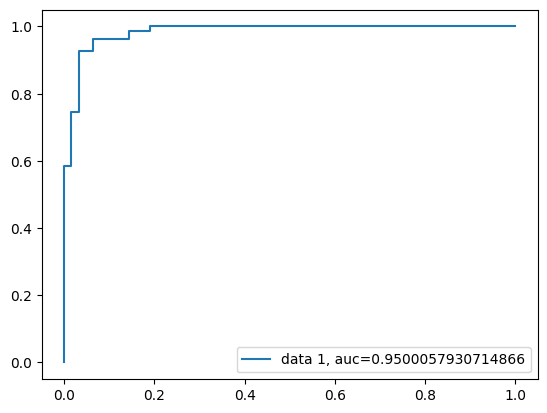

In [ ]:
# Visualisasi Kurva Receiving Operating Characteristic (ROC)
import matplotlib.pyplot as plt
y_pred_proba = model.predict_proba(X_test)[:, 1] # Get probabilities for the positive class
fp, tp, _ = met.roc_curve(y_test, y_pred_proba) # Use roc_curve to get fp and tp
plt.plot(fp, tp, label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Memilih Feature yang Terbaik dengan Metode Recursive Feature Elimination (RFE) - 3 Feature
import sklearn.feature_selection as fs
rfe = fs.RFE(estimator=model, n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)
print('Support=', rfe.support_)
print('Ranking=', rfe.ranking_)

Support= [False  True  True False  True]
Ranking= [3 1 1 2 1]
